## Notebook on Designing Direct Detection experiments

- In this notebook we will look more in detail of how direct dark matter detection experiments work. 
- If you're unfamiliar with Jupyter Notebooks, don't worry, this should be designed such that you only need to execute each cell (i.e. press shift + enter). 



- First we need to import the needed libraries for our calculations.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from __future__ import print_function

import DM_simple as DM 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


## Exercise 1 : Recoil rate of different target nuclei

- First we'll look at the differential recoil rate for xenon, argon and germanium targets. 
- Below click the "Run interact". 
- How is the recoil rate effected by the parameters $m_{\rm{DM}}$ and $\sigma$? (Click the slider to a new number and press "Run interact" again. 

In [3]:
interactive_plot = interact_manual(DM.plot_spec, m_x=DM.mdm_slide, sigma=DM.sigma_slide)

interactive(children=(FloatLogSlider(value=100.0, description='$m_{\\rm DM}\\,\\, (\\rm{GeV})$', layout=Layout…

<span style='background:yellow'> **Answer**: For the first question, we're just looking for them to notice that the shape changes if $m_{\rm DM}$ changes and $\sigma$ just effects the scale on the y-axis.</span>

- In the limit $E_R\rightarrow 0$, the rate for xenon is greater than germanium, which in turn, is greater than for argon. Can you explain why this is? You can use the interactive window to get a rough estimate, but you can also use the actual code as well. 

In [4]:
DM.rate_xenon(Er=1.0, m_x=100.0, sigma= 1e-44)

0.00046558938054364144

In [5]:
DM.rate_argon(Er=1.0, m_x=100.0, sigma= 1e-44)

4.4363789508252776e-05

In [6]:
DM.rate_germanium(Er=1.0, m_x=100.0, sigma= 1e-44)

0.00015063213711421158

<span style='background:yellow'>**Answer**: One thing to notice is that the result is nan as you put $E_R=0$ zero. Encourage them to think about whether a scattering where the nucleus is unaffected (i.e. when $E_R$ is exactly zero) makes sense. What they should see is the value is roughly fixed for $E_R$ closer and closer to $0$ like $10^{-6}$ for example.</span> 

<span style='background:yellow'>By taking the ratio we can get </span>

In [7]:
DM.rate_xenon(Er=1e-10, m_x=100.0, sigma= 1e-44)/DM.rate_argon(Er=1e-10, m_x=100.0, sigma= 1e-44)

10.886585894841144

<span style='background:yellow'>Spin independent scattering is enhanced by $A^2$ where $A$ is the nucleon number. For xenon, a common isotope is $ ^{132}{\rm Xe}$ and argon $ ^{40}{\rm Ar}$. The students might not know this so encourage them to think about the ratio and discuss with them the differences of each nuclei.</span>

<span style='background:yellow'>so we have</span>

In [8]:
132**2/40**2

10.89

## Exercise 2: Estimating the experimental setup of Xenon1T

- We learnt earlier that in a real experiment, detectors are not able to measure recoil energies ($E_R$) at arbitrarily low or high values.
- The lowest recoil an experiment can measure is called the **energy threshold**, $E_{\rm th}$.
- The highest recoil an experiment measures is $E_{\rm max}$. This is more of a choice than a experimental limitation, look at the differential rates above to think about why. 
- So the number of DM interactions detected per kg pr day is given by 

$$\int_{E_{\rm th}}^{E_{\rm max}}\frac{\textrm{d}R}{\textrm{d}E_R}.$$ 


- Lets try to understand a little bit about a real experiment, [Xenon1T](https://arxiv.org/pdf/1805.12562.pdf), which is a xenon target. 
- The collaboration reported the exclusion limit below. 

<img src="figures/Xenon1T.png" width="500" >

- It looks like the Xenon1T limit starts when $m_{\rm DM}\sim 6\,\,{\rm GeV}$.
- Use the interactive window below to estimate the value of $E_{\rm th}$ for the experiment.

In [9]:
interactive_plot2 = interact_manual(DM.plot_for_Eth, Eth=DM.Eth_slide, m_x=DM.mdm_slide, 
                                    sigma=DM.sigma_slide)

interactive(children=(FloatSlider(value=10.0, description='$E_{\\rm{th}}\\,\\,(\\rm{keV})$', layout=Layout(wid…

<span style='background:yellow'>**ANSWER**: By setting the mass to around $6\,\,{\rm GeV}$ we can see that the signal falls to the left of the threshold if its $E_{\rm th}= 10 {\rm keV}$, therefore there is no signal and counts are 0. By changing $E_{\rm th}$ we can see that the threshold is just over $\sim 3\,\,{\rm keV}$.</span>

- Now you have found the threshold energy, lets try to estimate the exposure $\epsilon$ of Xenon1T in kg days.
- **Hint**: Assume that the exclusion line is given when counts $\sim 1$. Look at the value for $\sigma$ around $m_{\rm DM}\sim 100\,\,{\rm GeV}$, use the interactive window above to estimate $\epsilon$.

<span style='background:yellow'>**ANSWER**: By setting the parameters $m_{\rm DM}\sim 100\,\,{\rm GeV}$, $E_{\rm th}\sim 3.3\,\,{\rm keV}$ and $\sigma=10^{-46}\,\,{\rm cm}^2$ (which I read off from the black line in the Xenon1T exclusion limit), I get $\sim 5\times 10^{-5}\,\, {\rm Counts }\,\,{\rm kg}^{-1}\,\,{\rm day}^{-1}$. So in order to have $\sim 1 $ recoil observed by the experiment, its expsosure should be $\sim 2\times 10^4\,\,{\rm kg}\,\, {\rm day}$.</span>

In [10]:
1/5e-5

20000.0

## Exercise 3: Building the Exclusion limit 

- Now we have a toy model of the Xenon1T experiment, lets see if we can produce a exclusion line similar to the one above. 
 
- Above we assumed that Counts ~ 1 is roughly where the exclusion limit will lay, this makes sense, but we can be more specific by using statistics.

- Direct detection is a counting experiment with its probability described by the Poisson distribution

$$\mathcal{P}\left(N_{\mathrm{obs}} | N_{\mathrm{th}}\right)=\frac{N_{\mathrm{th}}^{N_{\mathrm{obs}}} e^{-N_{\mathrm{th}}}}{N_{\mathrm{obs}} !}$$

- where $N_{\mathrm{th}}=N_{\mathrm{DM}}+N_{\mathrm{bk}}$, is the theoretical counts expected for a parameter point $\Theta$ and $N_{\mathrm{obs}}$ is the observed counts.

- $N_{\mathrm{bk}}$ is the number of expected background events. This is roughly zero for Xenon1T. 

- Xenon1T shown above is showing the 90% confidence level. This is like saying 90% of experiments would have detected more events given a theoretical expectation $N_{\mathrm{th}}$,

$$\sum_{m=N_{\mathrm{obs}}+1}^{\infty} \mathcal{P}\left(m | N_{b}, \Theta, \mathcal{M}_{i}\right)=0.9$$ 

- Xenon1T observed no nuclear recoil events $N_{\mathrm{obs}}=0.0$, show that the 90% confidence limit corresponds to $N_{\mathrm{DM}}=2.303$.

- **Hint** remember that all probabilities have to add up to 1, i.e. $\sum_{m=0}^{\infty}\mathcal{P} = 1$, use this to substitute out $\sum_{m=N_{\mathrm{obs}}+1}^{\infty} \mathcal{P}\left(m | N_{b}, \Theta, \mathcal{M}_{i}\right)$ to something more manageable. 

<span style='background:yellow'>**Answer**: Using the hint we get 

$$\sum_{m=0}^{N_{\mathrm{obs}}} \mathcal{P}\left(m |  N_{\mathrm{th}}\right)= 0.1$$

<span style='background:yellow'>since $N_{\mathrm{obs}}=0$ this is just</span>

$$\mathcal{P}\left(0 |  N_{\mathrm{th}}\right)=  e^{-N_{\mathrm{DM}}}= 0.1$$

<span style='background:yellow'>taking the log of each side we get $N_{\mathrm{DM}}=2.303$.</span>

- Now lets see if we can write a code which can calculate the value of $\sigma$ that corresponds to the 90\% confidence level (i.e. Counts equal to 2.303 or $N_{\mathrm{DM}}=2.303$).

- First in the cell below, specify the values for $E_{\rm th}$ and $\epsilon$ you found earlier.

In [11]:
xenon1t_eth = 3.3 ## type your Eth here
xenon1t_expo = 20000.0 ## type your exposure here

 Now you can call the function below to determine the expected number of recoil events 

In [12]:
DM.Nevents_xenon(Eth = xenon1t_eth, exposure=xenon1t_expo, m_x = 100.0, sigma=1e-46)

1.075026947159343

- Now you can use this function to find where $N_{\mathrm{DM}}=2.303$ for different mass values and produce your own exclusion line. 
- **Hint**: Remember earlier, when you experimented with what the differential rates looked like, changing $\sigma$ only really changed the values on the y-axis. The actual shape of the signal was only effected by $m_{\rm DM}$. This means you can write $ N(m_{\rm DM}^{\rm ref}, \sigma)= \sigma \times {\rm constant}$, where $m_{\rm DM}^{\rm ref}$ is the reference value of the mass.

<span style='background:yellow'>**Answer**: First consider the hint. For a given mass $m_{\rm DM}^{\rm ref}$,</span>

$$ \frac{ N(m_{\rm DM}^{\rm ref}, \sigma)}{\sigma} =\frac{  N(m_{\rm DM}^{\rm ref}, \sigma_{90\%})}{\sigma_{90\%}}$$

<span style='background:yellow'>where $\sigma_{90\%}$ is the cross-section that gives the 90% confidence level, which from earlier $N(m_{\rm DM}^{\rm ref}, \sigma_{90\%})=2.303$. Therefore </span>

$$\sigma_{90\%}= \frac{\sigma  \times 2.303}{N(m_{\rm DM}^{\rm ref}, \sigma)},$$

<span style='background:yellow'>so to find $\sigma_{90\%}$ for a given mass is a simple algorithm given below. </span>

In [13]:

def find_sigma90(m_x):

    ref_sig = 1e-46
    Nevents_ref = DM.Nevents_xenon(Eth = xenon1t_eth, exposure=xenon1t_expo, m_x = m_x, sigma=ref_sig)
    sigma90 = (ref_sig*2.303)/Nevents_ref
    

    return sigma90

    
    

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
mass_space = np.geomspace(6,1e3)

Text(0, 0.5, '$\\sigma\\,\\,\\left[{\\rm cm}^2\\right]$')

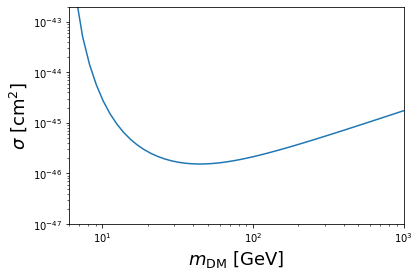

In [16]:
plt.loglog(mass_space,find_sigma90(mass_space))
plt.xlim(xmin=6.0,xmax=1e3)
plt.ylim(ymin=1e-47, ymax=2e-43)
plt.xlabel(r'$m_{\rm DM}\,\,\left[{\rm GeV}\right]$', size=18)
plt.ylabel(r'$\sigma\,\,\left[{\rm cm}^2\right]$', size=18)

- You can compare your exclusion limit with the one in the interactive window below. Be sure to check the experimental parameters $E_{\rm th}$ and $\epsilon$.

In [17]:
interactive_plot3 = interact_manual(DM.plot_exclusion, Eth=DM.Eth_slide, exposure=DM.expo_slide)

interactive(children=(FloatSlider(value=10.0, description='$E_{\\rm{th}}\\,\\,(\\rm{keV})$', layout=Layout(wid…

## Exercise 4: Finding dark matter in a future detector

- Now the next generation of xenon experiments will have $\sim 10$ times more exposure.
- Imagine now that dark matter has a $m_{\rm DM}$ and $\sigma$ just below our Xenon1T sensitivity. Then the next generation of detectors will discover something. 
- Below, there is a simulated "observation" of dark matter in black, you can use the interaction window to determine its $m_{\rm DM}$ and $\sigma$ values.
- Experiments are a bit more sophisticated than just getting a total number of recoils between $E_{\rm th} - E_{\rm max}$. The energy $E_R$ can be reconstructed, giving us more information about the nature of the signal.

- In the interactive window below put your values for a **future** xenon experiment $E_{\rm th}$ and $\epsilon$ in and vary the $m_{\rm DM}$ and $\sigma$  values. By matching the blue signal to the "observed" data, you can estimate the true values of $m_{\rm DM}$ and $\sigma$.  

In [18]:
interactive_plot4 = interact_manual(DM.plot_bin_reconstruction, Eth=DM.Eth_slide, exposure=DM.g2_expo_slide,
                                    m_x=DM.mdm_slide, 
                                    sigma=DM.sigma_slide)

interactive(children=(FloatSlider(value=3.6, description='$E_{\\rm{th}}\\,\\,(\\rm{keV})$', layout=Layout(widt…

<span style='background:yellow'>**Answer**: The values that produce the "observed" signal are $m_{\rm}=200$ GeV and $\sigma=2\times 10^{-46}\,\,{\rm cm}^2$. Fix the values for the new experiment and change the paramters so the blue lines up with the black. The students will probably find a lot of variation because at these masses the shape of the differential rate doesn't change that much, as we saw from the first interactive window.</span> 

### Comparison with the actual Xenon1T and Annual modulation

- You may notice that your limit is a little bit different from the Xenon1T limit. 
- Also if you look at their [paper](https://arxiv.org/pdf/1805.12562.pdf), you will see that their fiducial mass is 0.9 tons and the experiment was taking data for 278.8 days. This is potentially quite different from your estimated exposure. 
- To explore why this is, you can go to the [notebook here](./More_realistic_experimental_setup.ipynb).
- Aternatively you can explore the effects of annual modulation [in this notebook](Annual_modulation.ipynb).
- Here is the [Solutions notebook](./Solutions.ipynb).

